In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install pyLDAvis

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import spacy
import gensim

from gensim.utils import simple_preprocess
import nltk
from nltk.stem import WordNetLemmatizer
#import pyLDAvis
#import pyLDAvis.gensim_models

nlp = spacy.load('en')


In [ ]:
dataset2020_csv_path= '/content/drive/MyDrive/ADA_Proj/quotes-2020-clean.csv'
df_reader = pd.io.json.read_json(dataset2020_csv_path, lines=True, compression='bz2',chunksize=100000)

In [ ]:
def get_americans(df):
 return df[df['nationality'].apply(lambda x: False if x is None else 'Q30' in x )]

In [ ]:
import re
def punctuation(df):
  # Remove punctuation
  df['quotation_processed'] =   df['quotation'].map(lambda x: re.sub('[\[\],\.!?]', '', x))
  # Convert to lowercase
  df['quotation_processed'] =   df['quotation_processed'].map(lambda x: x.lower())
  return df

In [ ]:
import nltk
lemmatizer = WordNetLemmatizer()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[lemmatizer.lemmatize(word) for word in simple_preprocess(str(doc)) 
             if word not in spacy_stopwords] for doc in texts]



In [ ]:
import nltk
nltk.download('wordnet')
def get_data_words(df):
  data = df.quotation_processed.values.tolist()
  data_words = list(sent_to_words(data))
  # remove stop words
  data_words = remove_stopwords(data_words)
  return data_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary()
mydf=[]
for data in df_reader:

  df = get_americans(data)
  df = punctuation(df)
  mydf.append(df)
  data_words = get_data_words(df)
  dictionary.add_documents(data_words)
my_df= pd.concat(mydf, ignore_index=True)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
#corpus = [dictionary.doc2bow(doc) for doc in data_words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
df_reader = pd.io.json.read_json(dataset2020_csv_path, lines=True, compression='bz2',chunksize=100000)
corpus=[]
for df in df_reader:
  df = get_americans(df)
  df = punctuation(df)
  data_words = get_data_words(df)
  corpus = corpus + [dictionary.doc2bow(doc) for doc in data_words]

In [ ]:
from gensim.models import LdaMulticore
lda_model = LdaMulticore.load('/content/drive/MyDrive/ADA_Proj/lda_2020.model')

Whole model visualisation

In [ ]:
data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
pyLDAvis.save_html(data, "/content/drive/MyDrive/ADA_Proj/lda_vis_2020.html")

Cluster 3 seems to be about Coronavirus.\\
Cluster 8 seems to talk about problems that concern 3ammat al cha3b \\
cluster 16 talks about war with iran and terrorism in general \\
Cluster 19 is about public health in general (abortion, insurance ...) \\
Cluster 14 about tax policy \\
Cluster 13 about the elections \\



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','would','think','know','want'])
def wordclouds(df):
  text=df['quotation_processed'].str.cat(sep=' ')
  text=' '.join([word for word in text.split()])
  wordcloud = WordCloud(background_color = 'white', stopwords = stop_words , max_words = 70).generate(text)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show();
  return wordcloud

In [ ]:
to_pro = []
unseen_doc = corpus
vector = lda_model[unseen_doc]
for  t in vector:
  to_pro.append(t)

In [ ]:
y=np.array([np.array(xi) for xi in to_pro])
y.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(419143,)

In [ ]:
cluster_by_quote=[]
for arr in y :
  best_cluster_ind= np.argmax(arr[:,1])
  cluster_by_quote.append(arr[best_cluster_ind])

cluster_by_quote=np.array(cluster_by_quote)
intr =pd.DataFrame(data=cluster_by_quote[:,0], columns=["Cluster_num"])

my_df['Cluster_num']=intr

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
my_df['compound']=my_df['quotation'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

Let's seperate the republicans and democrats

In [ ]:
republican_df =my_df[my_df['party'].apply(lambda x: False if( x is None)or len(x)==0  else 'Q29468'  in x[-1] )]
democrat_df =my_df[my_df['party'].apply(lambda x: False if (x is None ) or len(x)==0  else 'Q29552'  in x[-1])]

In [ ]:
lda_model.show_topics(num_topics=20)

[(0,
  '0.064*"president" + 0.040*"country" + 0.030*"campaign" + 0.026*"deal" + 0.024*"trump" + 0.023*"america" + 0.022*"biden" + 0.017*"win" + 0.017*"joe" + 0.015*"better"'),
 (1,
  '0.083*"life" + 0.027*"social" + 0.022*"people" + 0.016*"save" + 0.013*"distancing" + 0.010*"security" + 0.009*"responsibility" + 0.009*"curve" + 0.009*"human" + 0.008*"essential"'),
 (2,
  '0.035*"money" + 0.023*"tax" + 0.020*"pay" + 0.014*"billion" + 0.014*"budget" + 0.013*"cut" + 0.010*"street" + 0.010*"dollar" + 0.009*"rate" + 0.009*"year"'),
 (3,
  '0.112*"going" + 0.081*"ve" + 0.032*"got" + 0.025*"week" + 0.025*"day" + 0.022*"time" + 0.021*"problem" + 0.018*"year" + 0.016*"number" + 0.015*"seen"'),
 (4,
  '0.097*"new" + 0.041*"city" + 0.035*"vote" + 0.030*"election" + 0.026*"york" + 0.024*"party" + 0.024*"voter" + 0.020*"democratic" + 0.016*"state" + 0.015*"percent"'),
 (5,
  '0.044*"house" + 0.033*"senate" + 0.021*"president" + 0.020*"impeachment" + 0.020*"trial" + 0.019*"witness" + 0.019*"republica

In [ ]:
democrat_sentiment_economy =democrat_df[democrat_df['Cluster_num']== 16]['compound']
republican_sentiment_economy  =republican_df[republican_df['Cluster_num']== 16]['compound']

In [ ]:
print('Mean of the sentiment of democrats regarding economy ',democrat_sentiment_economy.mean())
print('Mean of the sentiment of republicans regarding economy',republican_sentiment_economy.mean())

print('Variance of the sentiment of democrats regarding economy',democrat_sentiment_economy.var())
print('Variance of the sentiment of republicans regarding economy',republican_sentiment_economy.var())

ttest = ttest_ind(democrat_sentiment_economy,republican_sentiment_economy)
print(ttest)
print('The difference in the sentiment regarding War is  significant: ', ttest.pvalue<0.01)

Mean of the sentiment of democrats regarding economy  0.24785233474476748
Mean of the sentiment of republicans regarding economy 0.3008985195530731
Variance of the sentiment of democrats regarding economy 0.2169821931339785
Variance of the sentiment of republicans regarding economy 0.20346034382070038
Ttest_indResult(statistic=-10.18653931558353, pvalue=2.4852522013244687e-24)
The difference in the sentiment regarding War is  significant:  True


Let's study the sentiment of each party regarding coronoa

In [ ]:
democrat_sentiment_corona =democrat_df[democrat_df['Cluster_num']== 7]['compound']
republican_sentiment_corona =republican_df[republican_df['Cluster_num']== 7]['compound']

In [ ]:
print('Mean of the sentiment of democrats regarding corona',democrat_sentiment_corona.mean())
print('Mean of the sentiment of republicans regarding corona',republican_sentiment_corona.mean())

Mean of the sentiment of democrats regarding corona 0.007310628235444464
Mean of the sentiment of republicans regarding corona 0.02289526190120872


In [ ]:
print('Variance of the sentiment of democrats regarding corona',democrat_sentiment_corona.var())
print('Variance of the sentiment of republicans regarding corona',republican_sentiment_corona.var())

Variance of the sentiment of democrats regarding corona 0.2177111012554235
Variance of the sentiment of republicans regarding corona 0.2025374810528491


In [ ]:
from scipy.stats import ttest_ind

Text(0.5, 0, 'Sentiment')

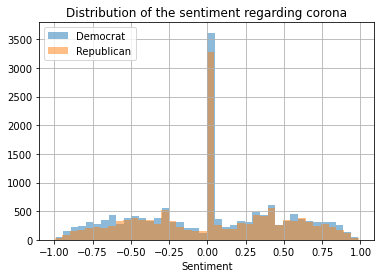

In [ ]:
democrat_sentiment_corona.hist(bins=40, alpha=0.5)
ax = republican_sentiment_corona.hist(bins=40, alpha=0.5)
ax.legend(labels=['Democrat','Republican'],loc='upper left')
ax.set_title('Distribution of the sentiment regarding corona')
plt.xlabel('Sentiment')

In [ ]:
ttest = ttest_ind(democrat_sentiment_corona,republican_sentiment_corona)
print(ttest)
print('The difference in the sentiment regarding corona is significant: ', ttest.pvalue<0.01)

Ttest_indResult(statistic=-2.884616574243724, pvalue=0.003921787254773848)
The difference in the sentiment regarding corona is significant:  True


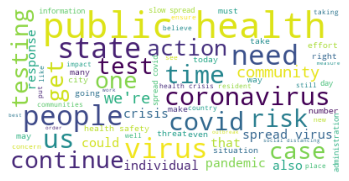

In [47]:
wordclouds(democrat_df[democrat_df['Cluster_num']== 7]).to_file('/content/drive/MyDrive/ADA_Proj/wordcloud_democrat_corona_2020.png')

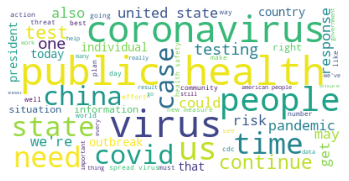

In [48]:
wordclouds(republican_df[republican_df['Cluster_num']== 7]).to_file('/content/drive/MyDrive/ADA_Proj/wordcloud_republican_corona_2020.png')

Let's now take a look at tax policy

In [ ]:
democrat_sentiment_tax =democrat_df[democrat_df['Cluster_num']== 2]['compound']
republican_sentiment_tax =republican_df[republican_df['Cluster_num']== 2]['compound']

In [ ]:
print('Mean of the sentiment of democrats regarding tax',democrat_sentiment_tax.mean())
print('Mean of the sentiment of republicans regarding tax',republican_sentiment_tax.mean())

Mean of the sentiment of democrats regarding tax 0.03929409149409139
Mean of the sentiment of republicans regarding tax 0.045959865470852


In [ ]:
print('Variance of the sentiment of democrats regarding tax',democrat_sentiment_tax.var())
print('Variance of the sentiment of republicans regarding public tax',republican_sentiment_tax.var())

Variance of the sentiment of democrats regarding tax 0.16612853947713702
Variance of the sentiment of republicans regarding public tax 0.15724094571892674


Text(0.5, 0, 'Sentiment')

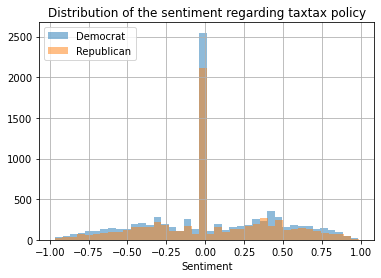

In [ ]:
democrat_sentiment_tax.hist(bins=40, alpha=0.5)
ax = republican_sentiment_tax.hist(bins=40, alpha=0.5)
ax.legend(labels=['Democrat','Republican'],loc='upper left')
ax.set_title('Distribution of the sentiment regarding taxtax policy')
plt.xlabel('Sentiment')

In [ ]:
ttest = ttest_ind(democrat_sentiment_tax,republican_sentiment_tax)
print(ttest)
print('The difference in the sentiment regarding public education is significant: ', ttest.pvalue<0.01)

Ttest_indResult(statistic=-1.0138179982070312, pvalue=0.31068570571317494)
The difference in the sentiment regarding public education is significant:  False


Sentiment about Health policy

In [ ]:
democrat_sentiment_health =democrat_df[democrat_df['Cluster_num']== 9]['compound']
republican_sentiment_health =republican_df[republican_df['Cluster_num']== 9]['compound']

In [ ]:
print('Mean of the sentiment of democrats regarding Helath policy',democrat_sentiment_health.mean())
print('Mean of the sentiment of republicans regarding Helath policy',republican_sentiment_health.mean())

Mean of the sentiment of democrats regarding Helath policy 0.13238389847313106
Mean of the sentiment of republicans regarding Helath policy 0.13266327014218


In [ ]:
print('Variance of the sentiment of democrats regarding Helath policy',democrat_sentiment_health.var())
print('Variance of the sentiment of republicans regarding Helath policy',republican_sentiment_health.var())

Variance of the sentiment of democrats regarding Helath policy 0.19797108323930832
Variance of the sentiment of republicans regarding Helath policy 0.18352143135570692


In [ ]:
ttest = ttest_ind(democrat_sentiment_health,republican_sentiment_health)
print(ttest)
print('The difference in the sentiment regarding Helath policy is significant: ', ttest.pvalue<0.01)

Ttest_indResult(statistic=-0.02865807016893215, pvalue=0.9771379772031541)
The difference in the sentiment regarding Helath policy is significant:  False


Sentiment regarding War

In [ ]:
democrat_sentiment_War =democrat_df[democrat_df['Cluster_num']== 19]['compound']
republican_sentiment_War =republican_df[republican_df['Cluster_num']== 19]['compound']

In [ ]:
print('Mean of the sentiment of democrats regarding War',democrat_sentiment_War.mean())
print('Mean of the sentiment of republicans regarding War',republican_sentiment_War.mean())

print('Variance of the sentiment of democrats regarding War',democrat_sentiment_War.var())
print('Variance of the sentiment of republicans regarding War',republican_sentiment_War.var())

ttest = ttest_ind(democrat_sentiment_War,republican_sentiment_War)
print(ttest)
print('The difference in the sentiment regarding War is  significant: ', ttest.pvalue<0.01)

Mean of the sentiment of democrats regarding War -0.2174437561070939
Mean of the sentiment of republicans regarding War -0.22185911290322508
Variance of the sentiment of democrats regarding War 0.2522807746116173
Variance of the sentiment of republicans regarding War 0.2682658416849725
Ttest_indResult(statistic=0.45756371833501447, pvalue=0.6472747001743471)
The difference in the sentiment regarding War is  significant:  False


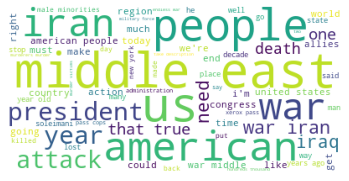

In [ ]:
wordclouds(democrat_df[democrat_df['Cluster_num']== 19])

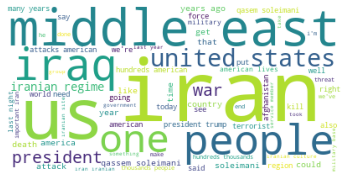

In [ ]:
wordclouds(republican_df[republican_df['Cluster_num']== 19])

In [ ]:
df = punctuation(democrat_df)
data_words = get_data_words(df)
corpus = [dictionary.doc2bow(doc) for doc in data_words]
data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency'

In [ ]:
pyLDAvis.save_html(data, "/content/drive/MyDrive/ADA_Proj/democrat_lda_vis_2020.html")

In [ ]:
df = punctuation(republican_df)
data_words = get_data_words(df)
corpus = [dictionary.doc2bow(doc) for doc in data_words]
data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency'

In [ ]:
pyLDAvis.save_html(data, "/content/drive/MyDrive/ADA_Proj/republican_lda_vis_2020.html")

In [49]:
Economic_policy_vals=[[0.310,0.333],[0.282180,0.3085293],[ 0.15798,0.12329],[0.190,0.187],[ 0.215181,0.205214],[0.3008985,0.247852]]

df_eco = pd.DataFrame(Economic_policy_vals, index=[2015,2016,2017,2018,2019,2020],columns =['Republican_mean','Democrat_mean'])

Text(0.5, 1.0, 'Sentiment regarding Economic Policy')

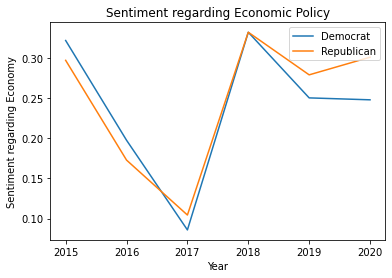

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.errorbar(df_eco.index, df_eco.Democrat_mean,
             capsize= 3)
plt.errorbar(df_eco.index, df_eco.Republican_mean,
             capsize= 3)

plt.legend(labels=['Democrat','Republican'],loc='upper right')
plt.xlabel('Year')
plt.ylabel('Sentiment regarding Economy')
plt.title('Sentiment regarding Economic Policy')

In [52]:
social_policy_vals=[[0.297,0.3216951],[0.1727914,0.1975108],[0.104381,0.085843],[0.332,0.332],[0.278948,0.25026],[0.13266,0.132383]]

df_eco = pd.DataFrame(Economic_policy_vals, index=[2015,2016,2017,2018,2019,2020],columns =['Republican_mean','Democrat_mean'])

Text(0.5, 1.0, 'Sentiment regarding Social Problems')

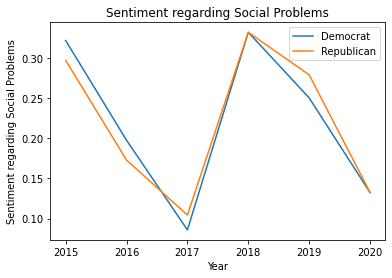

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.errorbar(df_eco.index, df_eco.Democrat_mean,
             capsize= 3)
plt.errorbar(df_eco.index, df_eco.Republican_mean,
             capsize= 3)

plt.legend(labels=['Democrat','Republican'],loc='upper right')
plt.xlabel('Year')
plt.ylabel('Sentiment regarding Social Problems')
plt.title('Sentiment regarding Social Problems')

In [54]:
War_policy_vals=[[-0.018,0.0611],[-0.04708,-0.011292],[-0.17727,-0.2267845],[0.137,0.0863],[0.11373,0.0806],[-0.221859,-0.2174437]]

df_eco = pd.DataFrame(Economic_policy_vals, index=[2015,2016,2017,2018,2019,2020],columns =['Republican_mean','Democrat_mean'])

Text(0.5, 1.0, 'Sentiment regarding War and foreing policy')

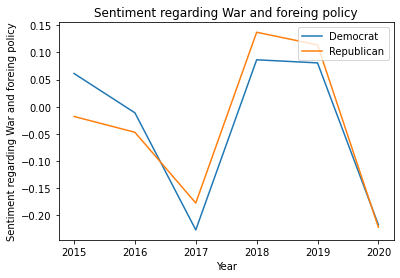

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.errorbar(df_eco.index, df_eco.Democrat_mean,
             capsize= 3)
plt.errorbar(df_eco.index, df_eco.Republican_mean,
             capsize= 3)

plt.legend(labels=['Democrat','Republican'],loc='upper right')
plt.xlabel('Year')
plt.ylabel('Sentiment regarding War and foreing policy')
plt.title('Sentiment regarding War and foreing policy')